In [144]:
#This is for HW5
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [69]:
# Read CSV files

city_path = os.path.join('raw_data', 'city_data.csv')
ride_path = os.path.join('raw_data', 'ride_data.csv')

city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)


# city_data = city_data.set_index('city')
city_data.head(5)
# ride_data.head(30)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [71]:
city_type = city_data.drop(['driver_count'], axis=1)
# city_type


In [111]:
# Retrieve the desired values in dataframe, groupBy city
merged_df = pd.merge(ride_data, city_data, on="city")
TotalRides = ride_data['ride_id'].count()
TotalRides

# Average Fare ($) Per City
perCity_df = merged_df.groupby('city').fare.mean()
perCity_df = perCity_df.to_frame('Avg Fare')

# Total Number of Rides Per City
perCity_df['Total Rides'] = merged_df.groupby('city').ride_id.count()
perCity_df['city'] = perCity_df.index

# Total Number of Drivers Per City and City type
perCity_df = pd.merge(perCity_df, city_data, on="city")


perCity_df = perCity_df.set_index('type')
perCity_df.head(3)


,Avg Fare,Total Rides,city,driver_count
type,,,,
Urban,23.928710,31,Alvarezhaven,21
Urban,20.609615,26,Alyssaberg,67
Suburban,37.315556,9,Anitamouth,16


In [112]:
urban_df = perCity_df.loc['Urban']
suburban_df = perCity_df.loc['Suburban']
rural_df = perCity_df.loc['Rural']
# perCity_df.head()
rural_df.head()

,Avg Fare,Total Rides,city,driver_count
type,,,,
Rural,33.660909,11,East Leslie,9
Rural,39.053000,10,East Stephen,6
Rural,33.244286,7,East Troybury,3
Rural,30.043750,8,Erikport,3
Rural,32.002222,9,Hernandezshire,10


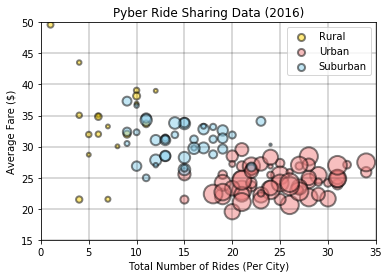

In [240]:
## Bubble Plot
x_rur = rural_df['Total Rides']
y_rur = rural_df['Avg Fare']
z_rur = rural_df['driver_count']*5

x_sub = suburban_df['Total Rides']
y_sub = suburban_df['Avg Fare']
z_sub = suburban_df['driver_count']*5

x_urb = urban_df['Total Rides']
y_urb = urban_df['Avg Fare']
z_urb = urban_df['driver_count']*5


Ru = plt.scatter(x_rur, y_rur, s=z_rur, alpha=0.5, c='gold', edgecolors="black", linewidth = 2)
Ur = plt.scatter(x_urb, y_urb, s=z_urb, alpha=0.5, c='lightcoral', edgecolors="black", linewidth = 2)
Su = plt.scatter(x_sub, y_sub, s=z_sub, alpha=0.5, c='skyblue', edgecolors="black", linewidth = 2)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

xmin = 0
xlim = 35
ymin = 15
ylim = 50
plt.xlim(xmin,xlim)
plt.ylim(ymin,ylim)

horLines = np.arange(ymin,ylim+5, 5)
verLines = np.arange(xmin,xlim+5, 5)

lgnd = plt.legend((Ru, Ur, Su),
          ('Rural', 'Urban', 'Suburban'))

lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.hlines(horLines, 0, xlim, alpha=0.2)
plt.vlines(verLines, 0, ylim, alpha=0.2)

plt.show()


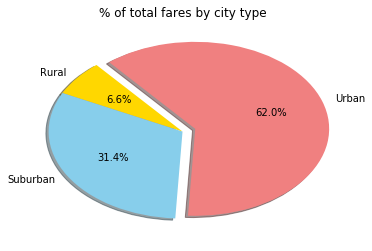

In [228]:
## PIE CHART 1
# % of total fares by city type
fares_df = merged_df.groupby('type').fare.sum()
fares_df = fares_df.to_frame('Total Fares')

labels = fares_df.index
explode = [0, 0, 0.1]
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(fares_df['Total Fares'], explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=130)
plt.title('% of total fares by city type')
plt.show()
plt.tight_layout()



In [229]:
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


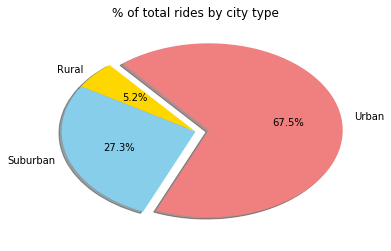

In [232]:
## PIE CHART 2
# % of total rides by city type
rides_df = merged_df.groupby('type').date.count()
rides_df = rides_df.to_frame('Total Rides')



labels = rides_df.index
explode = [0, 0, 0.1]
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(rides_df['Total Rides'], explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=130)
plt.title('% of total rides by city type')
plt.show()
plt.tight_layout()


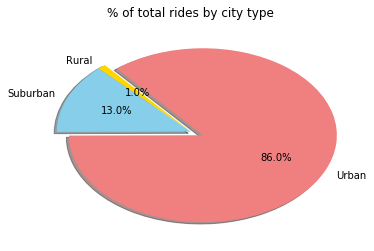

In [236]:
## PIE CHART 3
# % of total drivers per city type
drivers_df = merged_df.groupby('type').driver_count.sum()
drivers_df = drivers_df.to_frame('Total Drivers')


labels = drivers_df.index
explode = [0, 0, 0.1]
colors = ["gold", "skyblue", "lightcoral"]
plt.pie(drivers_df['Total Drivers'], explode=explode, labels=labels, colors=colors,
        autopct='{:.1f}%'.format, shadow=True, startangle=130)
plt.title('% of total rides by city type')
plt.show()
plt.tight_layout()

In [ ]:
# Don't forget
# include written description of 3 observalble trends
# You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.